This is an implementation of K-Means Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

Genarate Datasets synthetic data

In [2]:
X,_=make_blobs(n_samples=300, centers=4, random_state=42,cluster_std=0.60)

Although we have taken centres=4 , but that was because we did  not have actual data . Let us now assume we don't have the number of clusters and we have to find it out using the Elbow Method.

Elbow Method for finding the optimum number of clusters

In [3]:
inertia = []
K=range(1,11)
for k in K:
    kmeans = KMeans(n_clusters=k,random_state=0).fit(X)
    inertia.append(kmeans.inertia_)

print(inertia)

[19652.39537162305, 9712.894418498772, 1773.7368661265257, 203.8907468405834, 186.4814819635191, 167.11541230494524, 148.63709880016188, 131.26670208103826, 120.79296111860674, 109.89681152885025]


c:\Users\krish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\krish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\krish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\krish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

`[19652.39537162305, 9712.894418498772, 1773.7368661265257, 203.8907468405834, 186.4814819635191, 167.11541230494524, 148.63709880016188, 131.26670208103826, 120.79296111860674, 109.89681152885025]` we can notice the rapid decrease at first 4 clusters but then they stabalise after the 4th cluster. So , we now know that no of optimum clusters is 4.

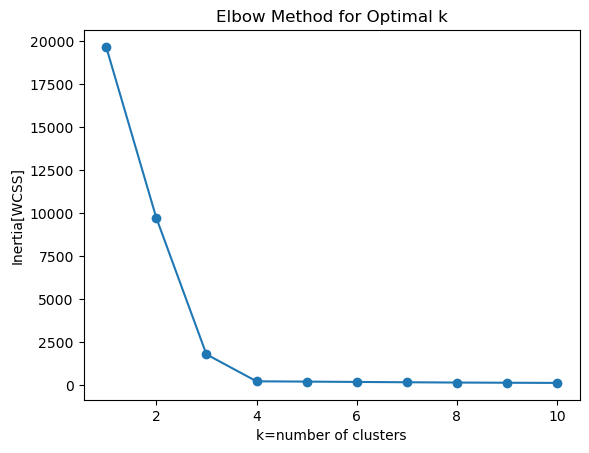

In [6]:
plt.plot(K,inertia,marker='o')
plt.xlabel('k=number of clusters')
plt.ylabel('Inertia[WCSS]')
plt.title("Elbow Method for Optimal k")
plt.show()

**Let us check for both clusters 3 and clusters 4**

Model Training[KMeans]

In [7]:
kmeans=KMeans(n_clusters=3,random_state=0)
labels=kmeans.fit_predict(X)   
labels

c:\Users\krish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


array([1, 1, 1, 2, 1, 2, 0, 2, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       2, 1, 1, 1, 1, 2, 2, 0, 1, 0, 1, 0, 1, 1, 1, 2, 1, 2, 0, 1, 1, 2,
       1, 1, 1, 0, 1, 0, 2, 1, 2, 1, 2, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 2,
       2, 2, 2, 1, 2, 2, 1, 0, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 1,
       0, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 2, 1, 0, 2, 1, 0, 0, 0, 0, 2, 1, 1, 1, 0, 2,
       1, 0, 2, 1, 1, 0, 1, 1, 2, 1, 0, 1, 2, 1, 1, 1, 1, 1, 2, 0, 0, 2,
       2, 0, 0, 2, 1, 1, 1, 0, 0, 1, 2, 1, 0, 0, 2, 2, 2, 1, 0, 2, 2, 0,
       0, 1, 1, 1, 2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 2, 0, 0, 1, 1, 0, 0, 0, 1, 1, 2, 0, 2, 1, 0, 1, 1, 1, 2,
       2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       2, 0, 2, 0, 0, 1, 1, 2, 0, 0, 1, 1, 2, 1, 1, 0, 0, 0, 0, 2, 1, 0,
       2, 0, 0, 2, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1], d

In [8]:
centres=kmeans.cluster_centers_
centres

array([[ 4.68687447,  2.01434593],
       [-5.7198651 ,  8.11855424],
       [-6.85126211, -6.85031833]])

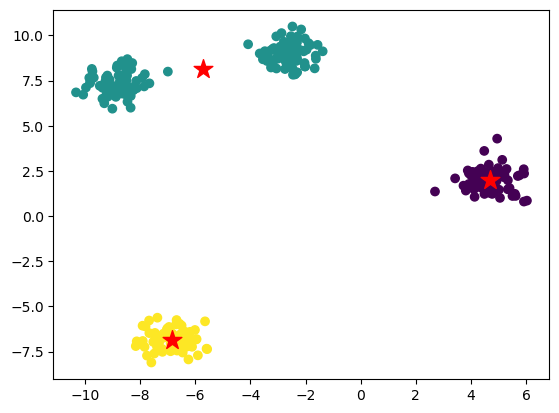

In [9]:
plt.scatter(X[:,0],X[:,1],c=labels)
plt.scatter(centres[:,0],centres[:,1],marker='*',c='red',s=200)
plt.show()

We can see that one centroid is out of the cluster - not good .

Let us do the Same for 4 clusters

In [14]:
kmeans_new=KMeans(n_clusters=4,random_state=0)
labels_new=kmeans_new.fit_predict(X)   
labels_new

c:\Users\krish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


array([1, 1, 3, 2, 1, 2, 0, 2, 3, 0, 3, 0, 3, 3, 1, 3, 1, 0, 3, 3, 0, 3,
       2, 1, 3, 1, 1, 2, 2, 0, 3, 0, 1, 0, 1, 3, 1, 2, 1, 2, 0, 3, 1, 2,
       3, 3, 1, 0, 1, 0, 2, 1, 2, 3, 2, 0, 1, 0, 0, 3, 1, 0, 0, 1, 2, 2,
       2, 2, 2, 3, 2, 2, 1, 0, 3, 1, 2, 2, 3, 2, 3, 3, 1, 3, 2, 1, 1, 0,
       0, 0, 1, 3, 1, 3, 3, 1, 2, 3, 1, 1, 0, 0, 0, 3, 3, 3, 3, 3, 2, 1,
       0, 3, 3, 3, 3, 0, 1, 2, 1, 2, 2, 2, 3, 1, 2, 1, 1, 3, 1, 2, 0, 3,
       3, 3, 3, 0, 0, 1, 3, 2, 3, 0, 2, 3, 0, 0, 0, 0, 2, 3, 3, 1, 0, 2,
       3, 0, 2, 1, 1, 0, 3, 1, 2, 1, 0, 1, 2, 3, 3, 3, 3, 3, 2, 0, 0, 2,
       2, 0, 0, 2, 1, 3, 1, 0, 0, 1, 2, 3, 0, 0, 2, 2, 2, 1, 0, 2, 2, 0,
       0, 1, 3, 3, 2, 0, 3, 2, 2, 1, 2, 3, 3, 2, 2, 0, 1, 2, 1, 1, 3, 1,
       1, 2, 1, 2, 0, 0, 1, 1, 0, 0, 0, 1, 3, 2, 0, 2, 1, 0, 1, 1, 1, 2,
       2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 3, 1, 3, 0, 3, 1, 3,
       2, 0, 2, 0, 0, 3, 3, 2, 0, 0, 1, 1, 2, 3, 3, 0, 0, 0, 0, 2, 1, 0,
       2, 0, 0, 2, 3, 2, 0, 3, 1, 3, 0, 3, 1, 1], d

In [16]:
centres_new=kmeans_new.cluster_centers_
centres_new

array([[ 4.68687447,  2.01434593],
       [-8.83456141,  7.24430734],
       [-6.85126211, -6.85031833],
       [-2.60516878,  8.99280115]])

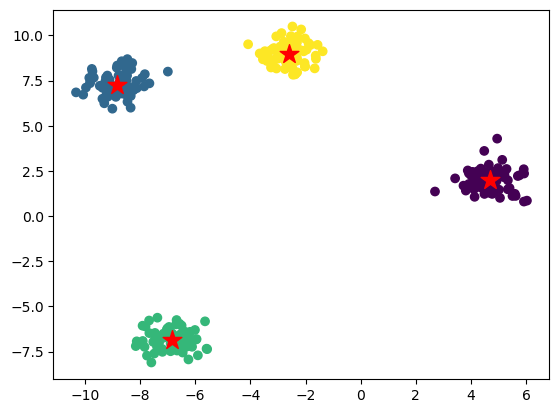

In [17]:
plt.scatter(X[:,0],X[:,1],c=labels_new)
plt.scatter(centres_new[:,0],centres_new[:,1],marker='*',c='red',s=200)
plt.show()

This is a much better clustering 